Sessions discovered:
         mineral    fps                                               path
0          Albit   1fps  R:\MUL\Courses\Applied ML\raman-mineral-classi...
1          Albit  30fps  R:\MUL\Courses\Applied ML\raman-mineral-classi...
2        Calcite   1fps  R:\MUL\Courses\Applied ML\raman-mineral-classi...
3        Calcite  30fps  R:\MUL\Courses\Applied ML\raman-mineral-classi...
4        Dolomit   1fps  R:\MUL\Courses\Applied ML\raman-mineral-classi...
5        Dolomit  30fps  R:\MUL\Courses\Applied ML\raman-mineral-classi...
6       Feldspat   1fps  R:\MUL\Courses\Applied ML\raman-mineral-classi...
7       Feldspat  30fps  R:\MUL\Courses\Applied ML\raman-mineral-classi...
8          Quarz   1fps  R:\MUL\Courses\Applied ML\raman-mineral-classi...
9          Quarz  30fps  R:\MUL\Courses\Applied ML\raman-mineral-classi...
10  Rhodocrosite   1fps  R:\MUL\Courses\Applied ML\raman-mineral-classi...
11  Rhodocrosite  30fps  R:\MUL\Courses\Applied ML\raman-mineral-classi...
12  

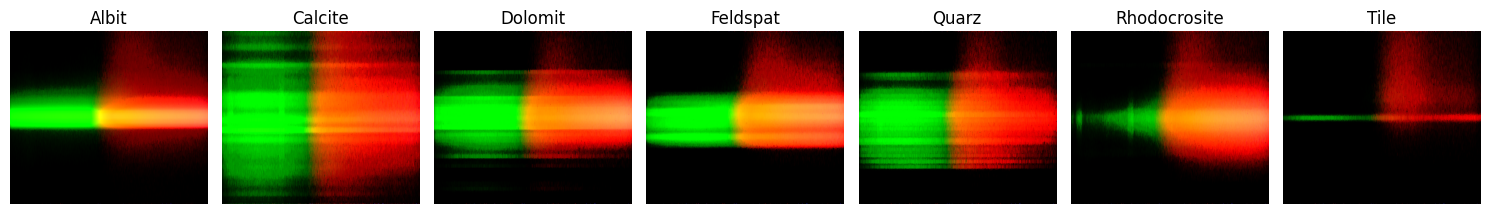

EDA complete - dataset discovery and stats computed.


In [ ]:
# 01_eda_preprocessing.ipynb

import os, random, json, sys
from pathlib import Path
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# --- Integration with config.py ---
# Add 'src' to path so we can import config
sys.path.append(str(Path.cwd().parent))
from notebooks.config import RAW_DATA_DIR, SEED

random.seed(SEED)
np.random.seed(SEED)

# Discover sessions
records = []
for mineral in RAW_DATA_DIR.iterdir():
    if not mineral.is_dir():
        continue
    for fps in ["1fps", "30fps"]:
        fps_dir = mineral / fps
        if fps_dir.exists():
            records.append({"mineral": mineral.name, "fps": fps, "path": fps_dir})

df_sessions = pd.DataFrame(records)
print("Sessions discovered:")
print(df_sessions)

# EDA: image stats
def load_image_stats(img_path):
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Keep RGB as per original concept
    return img.min(), img.max(), img.mean(), img.std()

# Optimized: Sample instead of looping thousands to prevent hang
SAMPLE_SIZE = 500
all_files = []
for _, row in df_sessions.iterrows():
    all_files.extend(list(row.path.glob("*.bmp")))

sample_files = random.sample(all_files, min(SAMPLE_SIZE, len(all_files)))

stats = []
for img_file in sample_files:
    # Finding which mineral this file belongs to for the dataframe
    mineral_name = img_file.parent.parent.name
    fps_val = img_file.parent.name
    
    mn, mx, mean, std = load_image_stats(img_file)
    stats.append([mineral_name, fps_val, mn, mx, mean, std])

stats_df = pd.DataFrame(stats, columns=["mineral","fps","min","max","mean","std"])
print("\nDescriptive Statistics (Sampled):")
print(stats_df.describe())

# Visualize random images from each class
unique_minerals = df_sessions['mineral'].unique()
fig, axes = plt.subplots(1, len(unique_minerals), figsize=(15, 5))

for i, mineral in enumerate(unique_minerals):
    # Get first session for this mineral and grab first image
    sess_path = df_sessions[df_sessions['mineral'] == mineral].iloc[0].path
    img_path = next(sess_path.glob("*.bmp"))
    
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    axes[i].imshow(img)
    axes[i].set_title(f"{mineral}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print("EDA complete - dataset discovery and stats computed.")